# Production modelling

In [492]:
# Libraries and parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate, learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [493]:
#Loading X_train, y_train, X_test, y_test from .csv creating in preprocessing

X_train = pd.read_csv('../preproc_data/X_train_preproc.csv', index_col=0)
y_train = pd.read_csv('../preproc_data/y_train.csv', index_col=0)["y_target"]

X_test = pd.read_csv('../preproc_data/X_test_preproc.csv', index_col=0)
y_test = pd.read_csv('../preproc_data/y_test.csv', index_col=0)["y_target"]

In [494]:
y_train.value_counts()

y_target
0    66450
1    30927
Name: count, dtype: int64

In [495]:
from imblearn.pipeline import Pipeline

# Sampling strategies
over = SMOTE(sampling_strategy=0.48)
under = RandomUnderSampler(sampling_strategy=0.5)

from sklearn import set_config;  set_config(display = 'diagram')

# Pipelining the two strategies
steps =  [('o', over), ('u', under)]
rebalancing_pipeline = Pipeline(steps=steps)
rebalancing_pipeline

# Rebalance the dataset
X_train_resampled, y_train_resampled = rebalancing_pipeline.fit_resample(X_train, y_train)

In [496]:
y_train_resampled.value_counts()

y_target
0    63792
1    31896
Name: count, dtype: int64

## Logistic Regression with unbalanced dataset

In [497]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [498]:
y_pred = model.predict(X_test)

print("Accuracy =", accuracy_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.6908755451190876
Recall = 0.08227800674409891
Precision = 0.6267123287671232


## Logistic regretion with balanced dataset

In [499]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=500)

In [500]:
y_pred = model.predict(X_test)

print("Accuracy =", accuracy_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.690683854890497
Recall = 0.09786436867740726
Precision = 0.6001838235294118


## Gradient Boosting Classifier

In [518]:
clf = GradientBoostingClassifier(loss="log_loss", n_estimators=500, learning_rate=0.1)
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [519]:
y_pred = clf.predict(X_test)

print("Accuracy =", accuracy_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.7017779268701778
Recall = 0.11959535406519296
Precision = 0.6960313999127781


In [524]:
hclf = HistGradientBoostingClassifier(loss="log_loss",
                                      l2_regularization=1,
                                      scoring="accuracy",
                                      validation_fraction=0.2,
                                      verbose=True,
                                      max_iter=500)
hclf.fit(X_train, y_train)

Binning 0.023 GB of training data: 0.223 s
Binning 0.006 GB of validation data: 0.013 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 31 leaves, max depth = 7, train score: 0.68240, val score: 0.68238, in 0.031s
[2/500] 1 tree, 31 leaves, max depth = 7, train score: 0.68240, val score: 0.68238, in 0.054s
[3/500] 1 tree, 31 leaves, max depth = 7, train score: 0.68280, val score: 0.68320, in 0.027s
[4/500] 1 tree, 31 leaves, max depth = 6, train score: 0.68680, val score: 0.68628, in 0.027s
[5/500] 1 tree, 31 leaves, max depth = 8, train score: 0.69080, val score: 0.68916, in 0.028s
[6/500] 1 tree, 31 leaves, max depth = 7, train score: 0.69210, val score: 0.69111, in 0.027s
[7/500] 1 tree, 31 leaves, max depth = 9, train score: 0.69330, val score: 0.69224, in 0.028s
[8/500] 1 tree, 31 leaves, max depth = 7, train score: 0.69400, val score: 0.69383, in 0.053s
[9/500] 1 tree, 31 leaves, max depth = 7, train score: 0.69490, val score: 0.69460, in 0.040s
[10/500] 1 tree, 31 leaves, max d

HistGradientBoostingClassifier(l2_regularization=1, max_iter=500,
                               scoring='accuracy', validation_fraction=0.2,
                               verbose=True)

In [523]:
y_pred = hclf.predict(X_test)

print("Accuracy =", accuracy_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.7028801456845737
Recall = 0.1096290745597602
Precision = 0.7385159010600707


In [508]:
test = pd.DataFrame(hclf.predict_proba(X_test))

In [515]:
test["pred"] = test[1].apply((lambda x: 1 if x > 0.45 else 0))
test

,0,1,pred
0,0.650377,0.349623,0
1,0.675620,0.324380,0
2,0.701878,0.298122,0
3,0.654433,0.345567,0
4,0.716467,0.283533,0
...,...,...,...
41729,0.541138,0.458862,1
41730,0.693912,0.306088,0
41731,0.421968,0.578032,1
41732,0.700911,0.299089,0


In [516]:
test["pred"].value_counts()

pred
0    40489
1     1245
Name: count, dtype: int64

In [517]:
print("Accuracy =", accuracy_score(y_test, test["pred"]))
print("Recall =", recall_score(y_test, test["pred"]))
print("Precision =", precision_score(y_test, test["pred"]))

Accuracy = 0.6977045095126276
Recall = 0.07396028475084301
Precision = 0.7927710843373494


### Tunning Gradient Boosting Classifier

In [269]:
params = {"n_estimators": [100, 120, 150], "learning_rate": [0.1]}

search = GridSearchCV(estimator=GradientBoostingClassifier(),
                      param_grid=params,
                      scoring="accuracy",
                      cv=5,
                      n_jobs=-1)

search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'n_estimators': [100, 120, 150]},
             scoring='accuracy')

In [271]:
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [243]:
# Get train scores (Accuracy), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=GradientBoostingClassifier(), X=X_train_resampled, y=y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1)

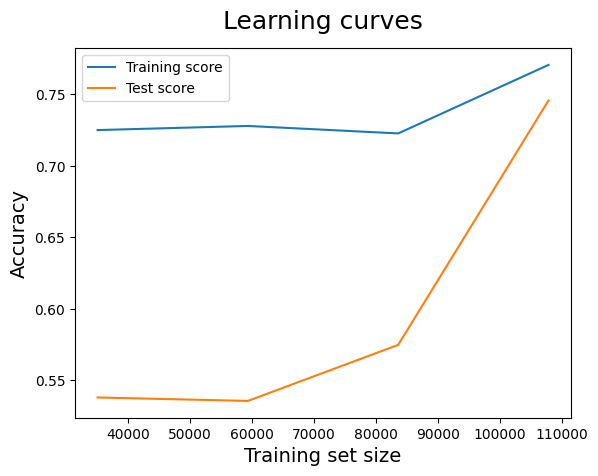

In [244]:
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

## Random Forest Classifier

In [473]:
rdc = RandomForestClassifier(n_estimators=100, criterion="log_loss")
rdc.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss')

In [474]:
y_pred = rdc.predict(X_test)

print("Accuracy =", accuracy_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.6702448842670244
Recall = 0.13221334940485158
Precision = 0.4389694847423712


## SGDC Classifier

In [224]:
sgdc = SGDClassifier()
sgdc.fit(X_train_resampled, y_train_resampled)

SGDClassifier()

In [225]:
y_pred = sgdc.predict(X_test)

print("Accuracy =", accuracy_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.5343897824030275
Recall = 0.7103124300946984
Precision = 0.3761203458759427


## Deep learning

In [291]:
from tensorflow.keras import layers, Sequential

In [475]:
model_dl = Sequential([
    layers.Dense(5, activation="relu", input_dim=42),
    layers.Dense(5, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_dl.compile(optimizer="adam",
              loss='binary_crossentropy', 
              metrics = 'accuracy')

history = model_dl.fit(X_train,
                       y_train,
                       batch_size=16,
                       epochs=100,
                       use_multiprocessing=True,
                       validation_split=0.2,
                       verbose=True)

Epoch 1/100


ValueError: in user code:

    File "/Users/jeremiesordoillet/.pyenv/versions/3.10.6/envs/mlb_classification/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/jeremiesordoillet/.pyenv/versions/3.10.6/envs/mlb_classification/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/jeremiesordoillet/.pyenv/versions/3.10.6/envs/mlb_classification/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/jeremiesordoillet/.pyenv/versions/3.10.6/envs/mlb_classification/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/Users/jeremiesordoillet/.pyenv/versions/3.10.6/envs/mlb_classification/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/jeremiesordoillet/.pyenv/versions/3.10.6/envs/mlb_classification/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 42), found shape=(None, 23)


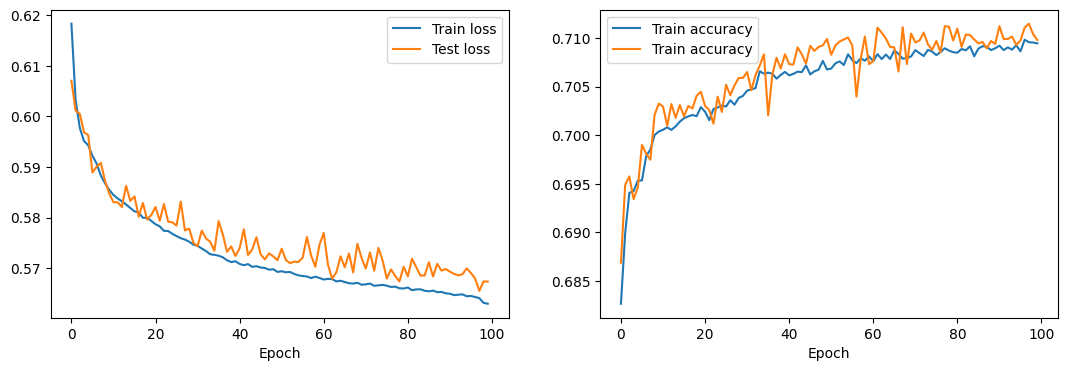

In [280]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))

ax1.plot(history.history['loss'], label="Train loss")
ax1.plot(history.history['val_loss'], label="Test loss")
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.plot(history.history['accuracy'], label="Train accuracy")
ax2.plot(history.history['val_accuracy'], label="Train accuracy")
ax2.set_xlabel('Epoch')
ax2.legend()

In [281]:
y_pred = model_dl.predict(X_test)
y_pred

1322/1322 [==============================] - 0s 242us/step


array([[0.31466126],
       [0.28927585],
       [0.46565798],
       ...,
       [0.2070748 ],
       [0.32420212],
       [0.25584897]], dtype=float32)

In [282]:
y_pred = np.round(y_pred)

In [283]:
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.7059129612109745
Recall = 0.13235403773022145
Precision = 0.6898561989895065


## Try PCA before model

In [199]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=10)

pipe = make_pipeline(pca,
               GradientBoostingClassifier())
pipe

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [200]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [201]:
y_pred = pipe.predict(X_test)

In [202]:
accuracy_score(y_test, y_pred)

0.6824503311258279

In [181]:
pd.DataFrame(y_pred).value_counts()

0    42006
1       32
Name: count, dtype: int64